In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)

# Exploratory Data Analysis: Data Inspection & Transformation

In [2]:
df = pd.read_csv("01_Melbourne_Residential.csv")  # e.g., "../data/01_Melbourne_Residential.csv"
print("Raw shape:", df.shape)
display(df.head(3))
display(df.describe(include="all"))

Raw shape: (13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,3,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,2,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,2,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,1/1 Clarendon St,NaN,h,NaN,S,Nelson,27/05/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


In [3]:
rename_map = {
    "Suburb":"suburb","Address":"address","Rooms":"rooms","Type":"type",
    "Price":"price","Method":"method","Seller":"seller","Date":"date",
    "Distance":"distance","Postcode":"postcode","Bedroom2":"bedroom2",
    "Bathroom":"bathroom","Car":"car","Landsize":"land_size",
    "BuildingArea":"building_area","YearBuilt":"year_built",
    "CouncilArea":"council_area","Lattitude":"latitude","Longtitude":"longitude",
    "Latitude":"latitude","Longitude":"longitude","Region":"region",
    "Regionname":"region","Propertycount":"property_count"
}
df.rename(columns=rename_map, inplace=True)
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)
print("Columns after rename:", list(df.columns))

Columns after rename: ['suburb', 'address', 'rooms', 'type', 'price', 'method', 'seller', 'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'land_size', 'building_area', 'year_built', 'council_area', 'latitude', 'longitude', 'region', 'property_count']


In [4]:
# Ensure 'date' is datetime (others will be coerced numeric)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

num_candidates = [
    'price','rooms','bedroom2','bathroom','car','distance',
    'land_size','building_area','year_built','latitude','longitude','property_count'
]
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'postcode' in df.columns:
    # Keep as string; leading zeros and categories matter
    df['postcode'] = df['postcode'].astype(str)

In [5]:
print("\nMissing values (top 15):")
mv = df.isna().sum().sort_values(ascending=False).head(15)
display(mv)

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates().copy()
print("Shape after dropping duplicates:", df.shape)


Missing values (top 15):


date             8442
building_area    6450
year_built       5375
council_area     1369
car                62
suburb              0
bathroom            0
region              0
longitude           0
latitude            0
land_size           0
bedroom2            0
address             0
postcode            0
distance            0
dtype: int64

Duplicate rows: 8
Shape after dropping duplicates: (13572, 21)


missingno not available, using seaborn barplot instead: No module named 'missingno'


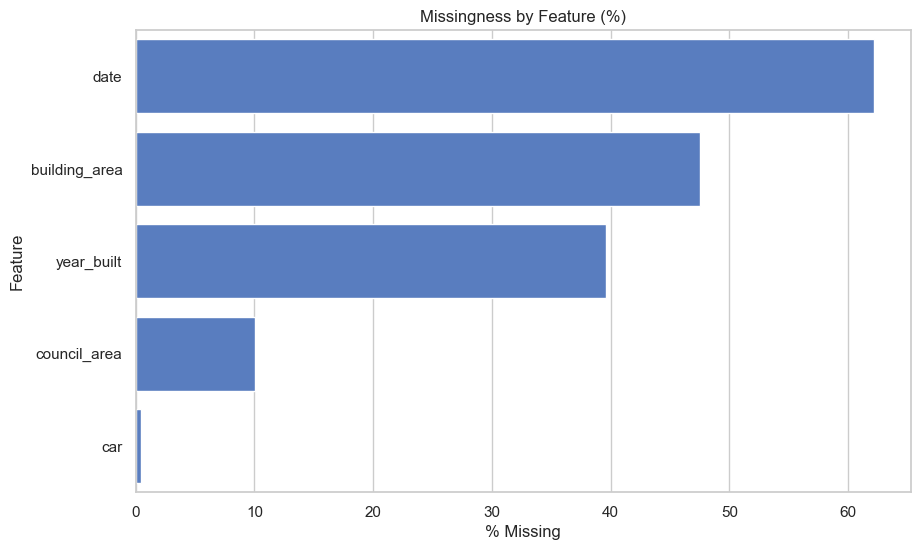

In [6]:
try:
    import missingno as msno
    print("Missingness matrix (sampled if large):")
    msno.matrix(df.sample(min(len(df), 3000), random_state=123))
    plt.title("Missingness Matrix (sampled)"); plt.show()

    print("Missingness barplot:")
    msno.bar(df)
    plt.title("Missingness Barplot"); plt.show()
except Exception as e:
    print("missingno not available, using seaborn barplot instead:", e)
    miss_pct = (df.isna().mean()*100).sort_values(ascending=False)
    miss_pct = miss_pct[miss_pct > 0]
    if len(miss_pct):
        plt.figure(figsize=(10,6))
        sns.barplot(x=miss_pct.values, y=miss_pct.index)
        plt.xlabel("% Missing"); plt.ylabel("Feature"); plt.title("Missingness by Feature (%)")
        plt.show()

In [7]:
drop_cols = [c for c in ['address', 'seller'] if c in df.columns]
df.drop(columns=drop_cols, inplace=True, errors='ignore')
print("Dropped columns:", drop_cols)

Dropped columns: ['address', 'seller']


In [8]:
df['price_log'] = np.log1p(df['price'])

if 'building_area' in df.columns:
    # Avoid divide-by-zero; leave NaN for PyCaret imputation downstream
    df['price_per_sqm'] = df['price'] / df['building_area'].replace(0, np.nan)
else:
    df['price_per_sqm'] = np.nan

if 'year_built' in df.columns:
    df['property_age'] = df['date'].dt.year - df['year_built']
else:
    df['property_age'] = np.nan

print("Feature engineering completed. Current columns:", df.columns.tolist())

Feature engineering completed. Current columns: ['suburb', 'rooms', 'type', 'price', 'method', 'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'land_size', 'building_area', 'year_built', 'council_area', 'latitude', 'longitude', 'region', 'property_count', 'price_log', 'price_per_sqm', 'property_age']


In [9]:
print("\nPreview of cleaned data:")
display(df.head(10))



Preview of cleaned data:


,suburb,rooms,type,price,method,date,distance,postcode,bedroom2,bathroom,car,land_size,building_area,year_built,council_area,latitude,longitude,region,property_count,price_log,price_per_sqm,property_age
0,Airport West,3,t,840000,PI,2023-03-09,13.5,3042,3,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464,13.641158,3733.333333,7.0
1,Albert Park,2,h,1275000,S,2023-03-09,3.3,3206,2,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280,14.058458,15548.780488,123.0
2,Albert Park,2,h,1455000,S,2023-03-09,3.3,3206,2,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280,14.190517,NaN,NaN
3,Alphington,4,h,2000000,S,2023-03-09,6.4,3078,3,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211,14.508658,7604.562738,93.0
4,Alphington,3,h,1110000,S,2023-03-09,6.4,3078,3,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211,13.919871,NaN,10.0
5,Altona,3,h,520000,VB,2023-03-09,13.8,3018,3,2,1.0,352,242.0,2015.0,Hobsons Bay,-37.8700,144.8250,Western Metropolitan,5301,13.161586,2148.760331,8.0
6,Altona North,5,h,1085000,S,2023-03-09,11.1,3025,5,3,6.0,592,251.0,1965.0,Hobsons Bay,-37.8388,144.8567,Western Metropolitan,5132,13.897091,4322.709163,58.0
7,Altona North,3,h,781000,S,2023-03-09,11.1,3025,3,1,2.0,533,117.0,1970.0,Hobsons Bay,-37.8291,144.8350,Western Metropolitan,5132,13.568332,6675.213675,53.0
8,Armadale,2,u,599000,S,2023-03-09,6.3,3143,2,1,1.0,0,76.0,1964.0,Stonnington,-37.8543,145.0262,Southern Metropolitan,4836,13.303019,7881.578947,59.0
9,Ascot Vale,2,u,455000,S,2023-03-09,5.9,3032,3,1,2.0,0,NaN,NaN,Moonee Valley,-37.7756,144.9165,Western Metropolitan,6567,13.028055,NaN,NaN


# Exploratory Data Analysis (Visualisation Dashboard)

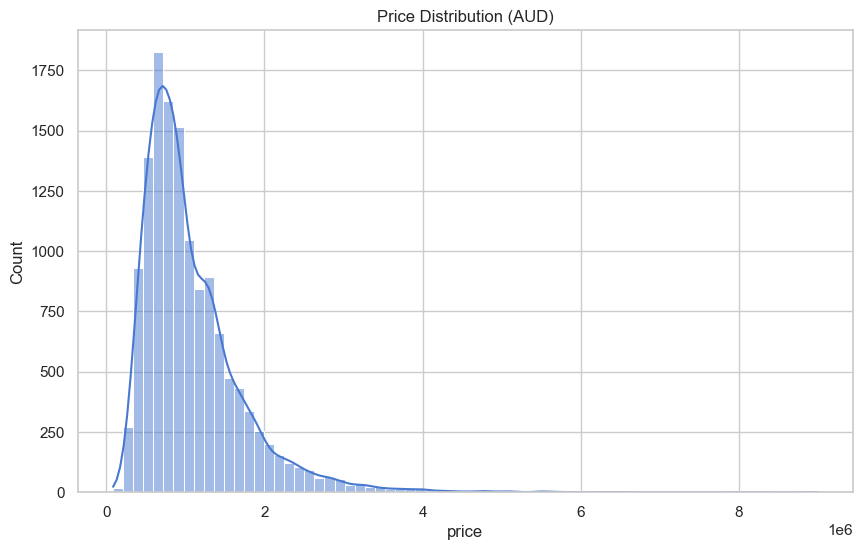

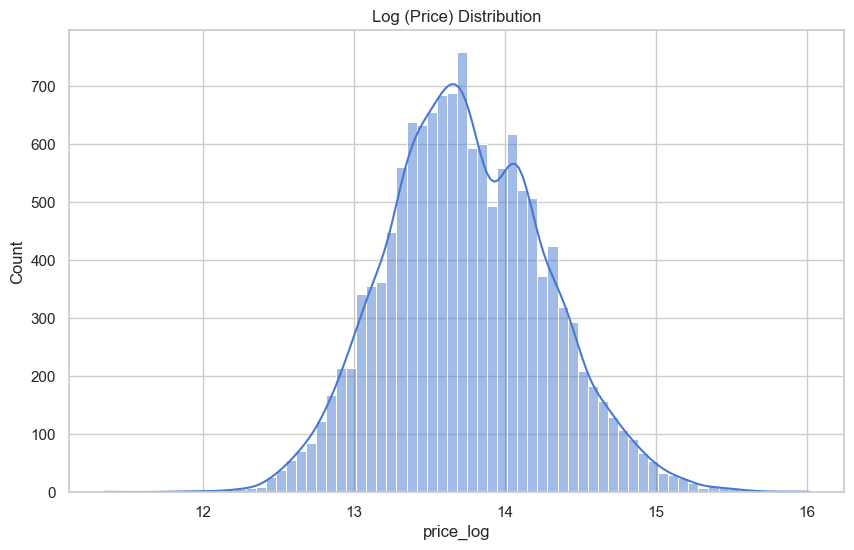

In [10]:
# Price distribution (linear + log)
plt.figure(); sns.histplot(df['price'].dropna(), bins=70, kde=True); plt.title("Price Distribution (AUD)"); plt.show()
plt.figure(); sns.histplot(df['price_log'].dropna(), bins=70, kde=True); plt.title("Log (Price) Distribution"); plt.show()


The analysis of the Melbourne residential property dataset reveals a critical insight for the machine learning model: the target variable, price, is not normally distributed.

The initial price distribution plot shows a severe right-skew, with most properties clustered at lower prices and a long tail of very expensive, outlier properties. This characteristic poses a significant challenge for a standard regression model, which assumes a more symmetrical data distribution.

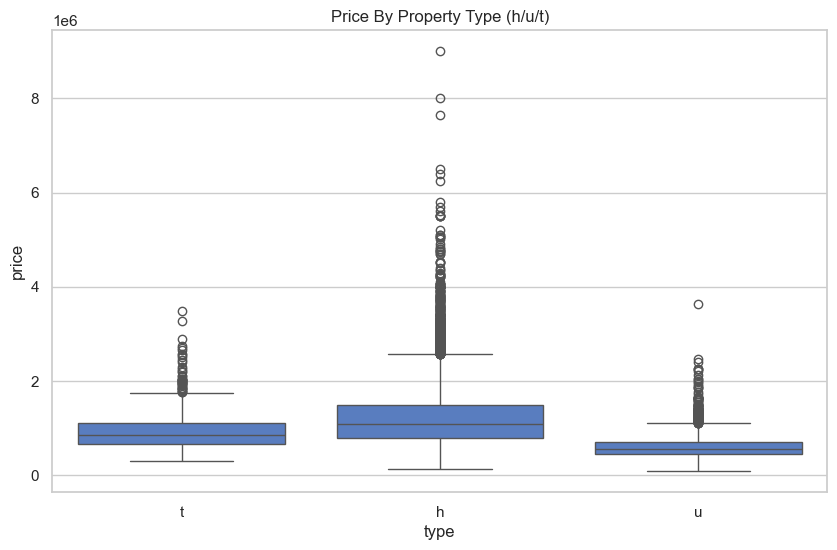

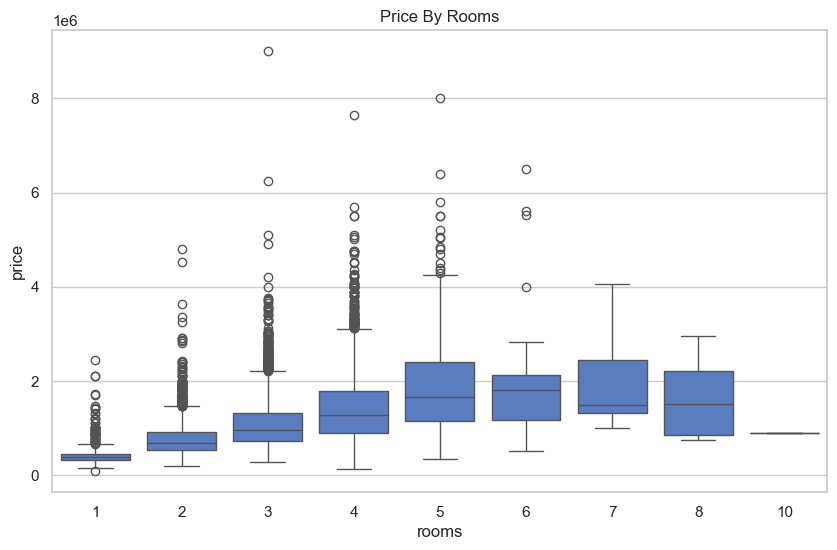

In [11]:
if 'type' in df.columns:
    plt.figure(); sns.boxplot(x='type', y='price', data=df); plt.title("Price By Property Type (h/u/t)"); plt.show()

if 'rooms' in df.columns:
    plt.figure(); sns.boxplot(x='rooms', y='price', data=df.sort_values('rooms')); plt.title("Price By Rooms"); plt.show()

1. Price by Property Type: The plots show distinct price distributions based on property type. Houses (h) have the highest median price and the widest price range, while units (u) are the least expensive with the lowest price variability. Townhouses (t) fall in between. This confirms that property type is a strong predictor of price and a critical feature for your model.

2. Price by Rooms: There is a clear positive correlation between the number of rooms and the median price. As the number of rooms increases, the median price generally rises. However, the data for properties with 8 and 10 rooms is very sparse, which may affect the model's ability to accurately predict prices for these less common properties.

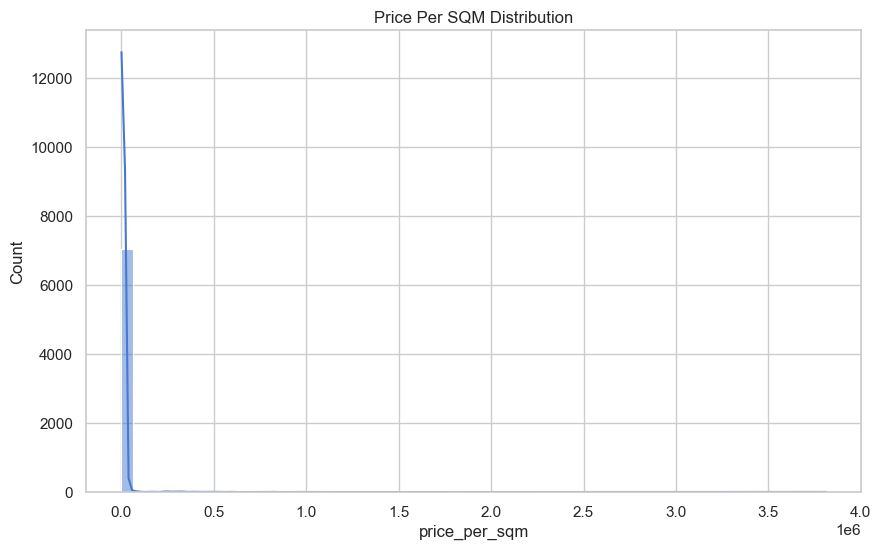

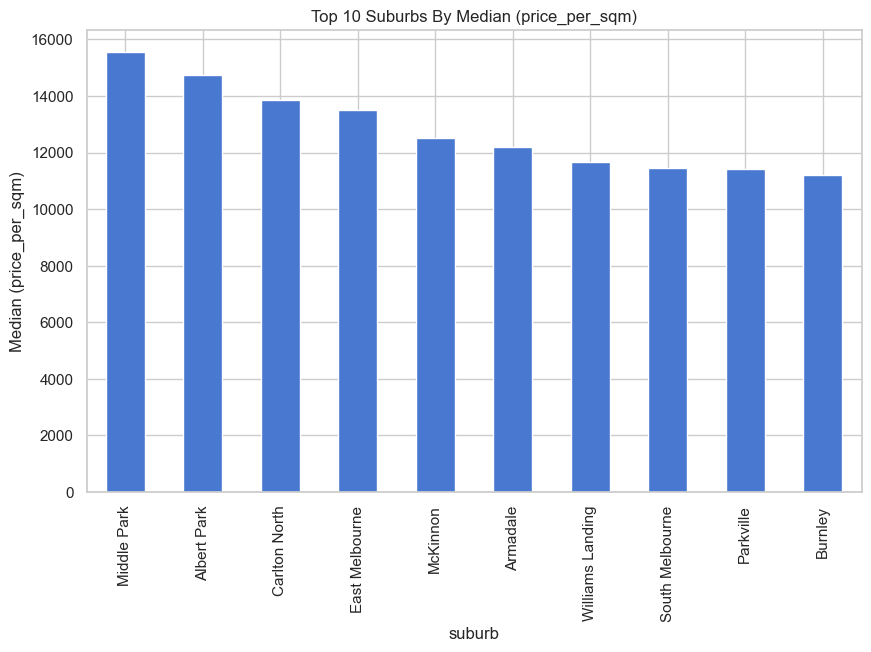

In [12]:
# Price per sqm (if available) & top suburbs
if 'price_per_sqm' in df.columns:
    plt.figure(); sns.histplot(df['price_per_sqm'].dropna(), bins=60, kde=True); plt.title("Price Per SQM Distribution"); plt.show()
    if 'suburb' in df.columns:
        top_ppsqm = df.groupby('suburb')['price_per_sqm'].median().sort_values(ascending=False).head(10)
        plt.figure(); top_ppsqm.plot(kind='bar'); plt.title("Top 10 Suburbs By Median (price_per_sqm)"); plt.ylabel("Median (price_per_sqm)"); plt.show()

1. Price Per SQM Distribution: The price per square meter is highly right-skewed, similar to the raw price data. This indicates that while there might be a valuable new feature created, it will also need to be normalized (e.g., via a log transformation) to improve the performance of the machine learning model.

2. Top Suburbs by Price Per SQM: The analysis of this engineered feature reveals which suburbs have the most expensive real estate on a per-square-meter basis. This confirms that location (suburb) is a powerful predictor of a property's value, and the price_per_sqm feature effectively captures this metric.

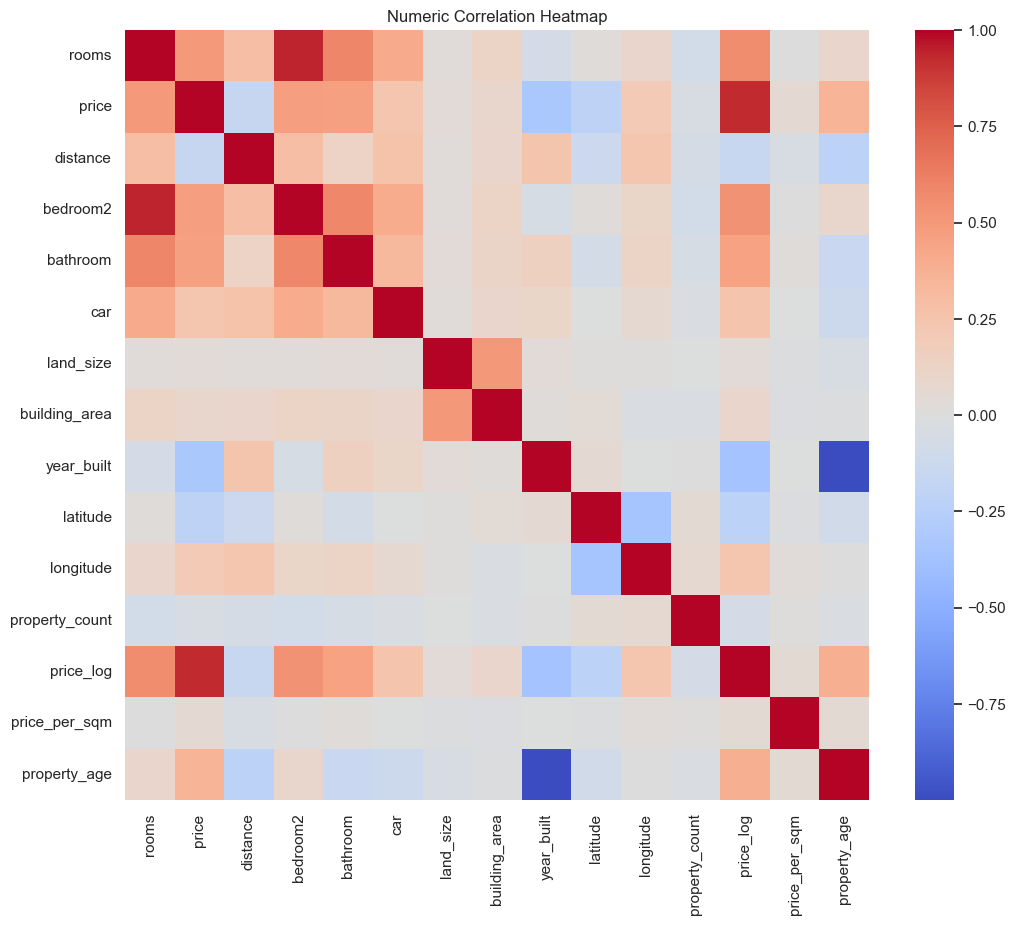

Top correlations with price:
 price            1.000000
price_log        0.927694
rooms            0.496593
bedroom2         0.475905
bathroom         0.467029
property_age     0.355708
car              0.239028
longitude        0.203651
building_area    0.090972
price_per_sqm    0.062249
Name: price, dtype: float64


In [13]:
# Numeric correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Numeric Correlation Heatmap")
plt.show()

if 'price' in df.columns:
    print("Top correlations with price:\n", df.corr(numeric_only=True)['price'].sort_values(ascending=False).head(10))


The above analysis confirms that several features have a strong relationship with the target variable, price. The most significant positive correlations are found with the number of rooms, bedrooms, and bathrooms. This confirms that these features are powerful predictors of a property's value. Conversely, there is a moderate negative correlation with distance to the CBD, indicating that properties further away tend to be less expensive.

Pairplot features: ['price_log', 'rooms', 'bedroom2', 'bathroom', 'property_age']


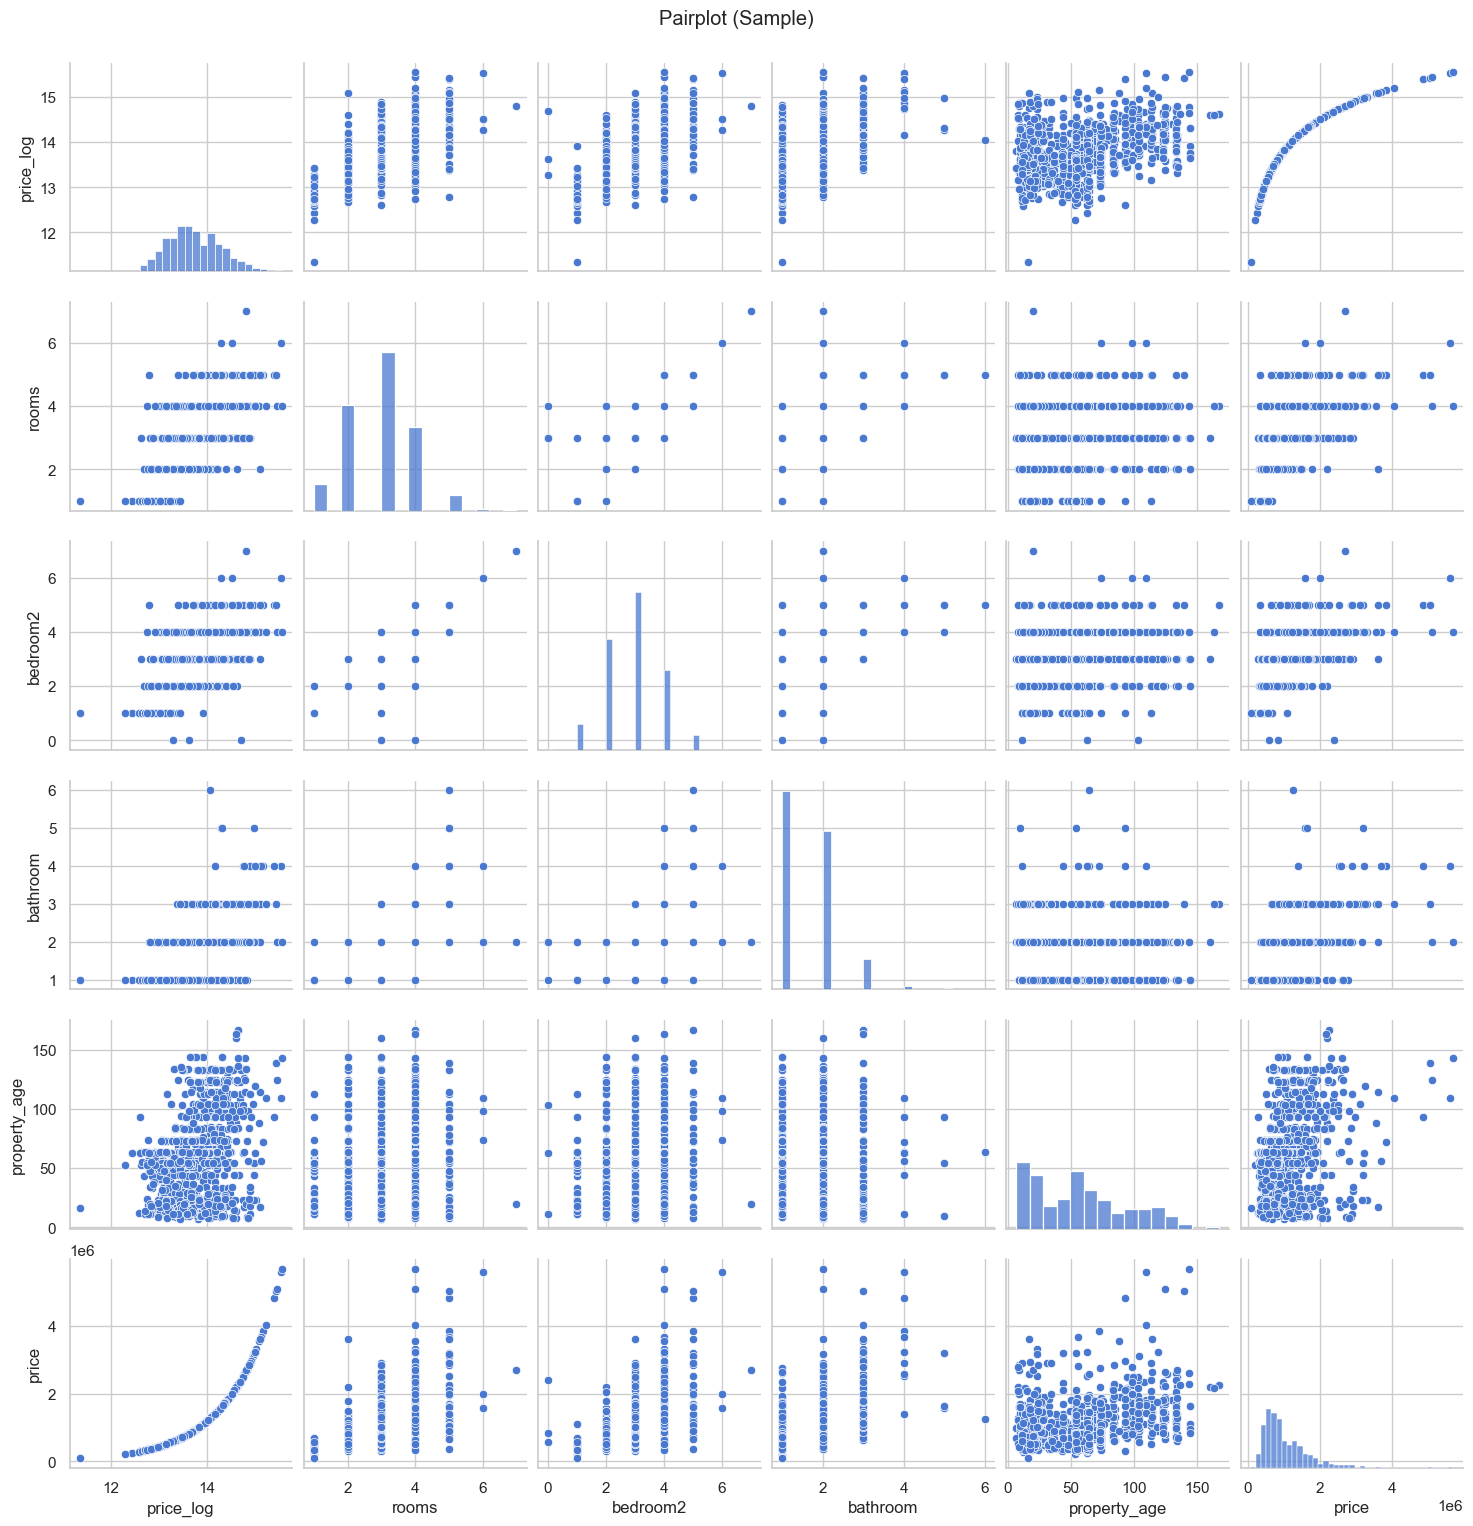

In [14]:
# Pairplot for top predictors (sampled for speed)
if 'price' in df.columns:
    corr_with_price = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
    top_feats = [c for c in corr_with_price.index if c != 'price'][:5]
    print("Pairplot features:", top_feats)
    base = df[top_feats + ['price']].dropna()
    if len(base) > 50:
        sns.pairplot(base.sample(min(1000, len(base)), random_state=123))
        plt.suptitle("Pairplot (Sample)", y=1.02); plt.show()

The above pairplot confirms that rooms, bedroom2, and bathroom are highly correlated with price_log, making them strong predictors for your model. This validates the model's feature selection and confirms that a greater number of rooms or bathrooms corresponds to a higher property price.

Additionally, the diagonal histogram for price_log shows a near-normal distribution, demonstrating that the logarithmic transformation effectively prepared the target variable for a regression model.

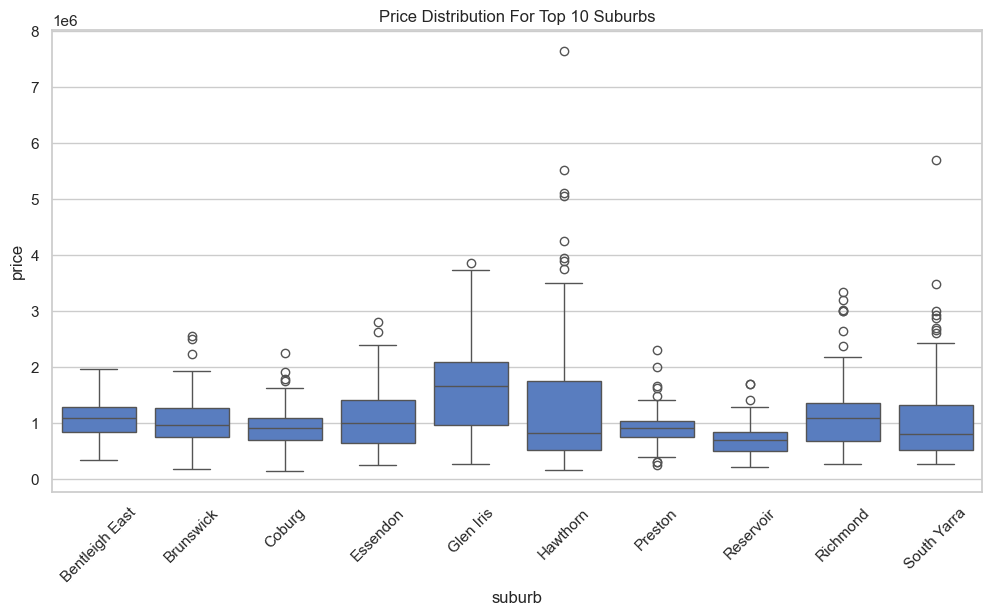

In [16]:
# Top 10 suburb boxplots
if 'suburb' in df.columns:
    top_subs = df['suburb'].value_counts().nlargest(10).index
    plt.figure(figsize=(12,6)); sns.boxplot(x='suburb', y='price', data=df[df['suburb'].isin(top_subs)])
    plt.xticks(rotation=45); plt.title("Price Distribution For Top 10 Suburbs"); plt.show()

The box plot analysis confirms that a property's suburb is a crucial factor in determining its price. The visualization reveals significant differences in median prices and price variability across the top 10 suburbs with the most listings.

Specifically, suburbs like Hawthorn and Glen Iris have substantially higher median prices and more high-value outliers than other areas, such as Reservoir and Preston. 

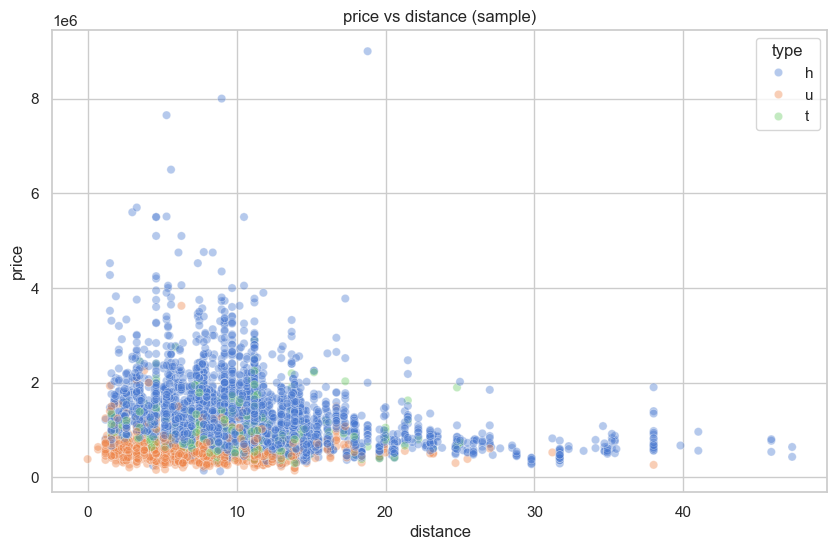

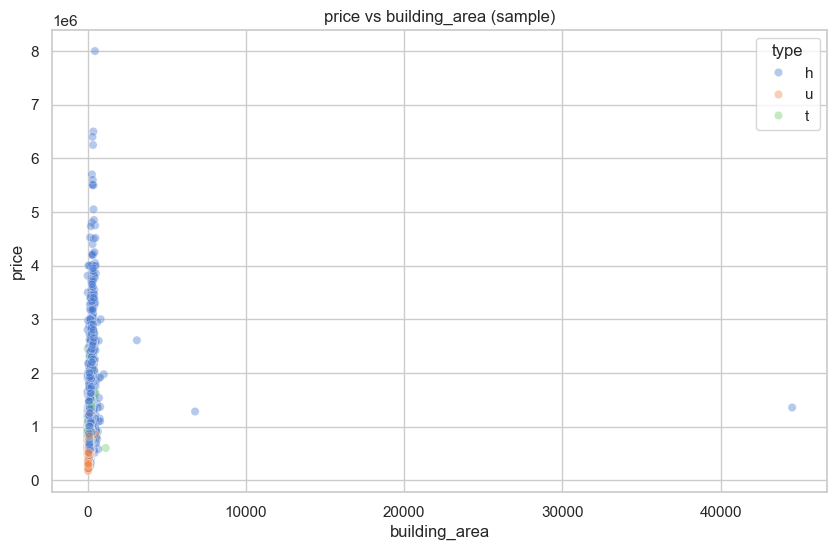

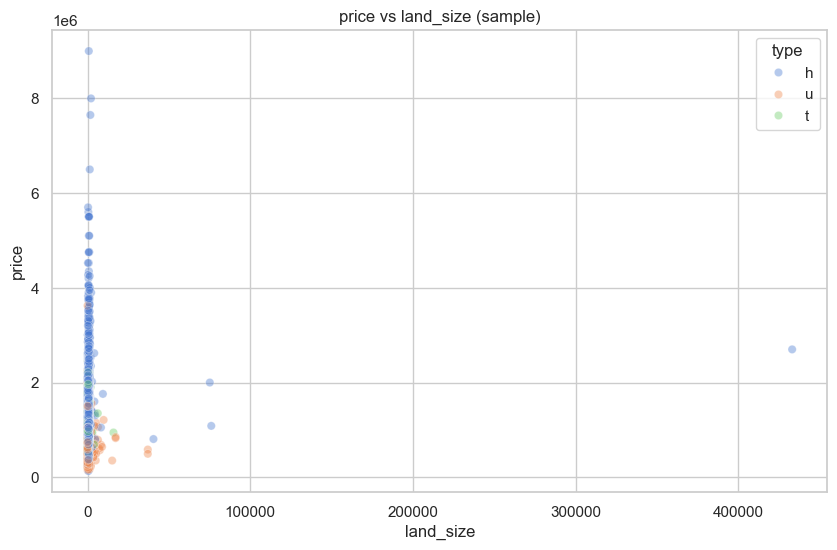

In [17]:
# Bivariate scatter plots
pairs = [('distance','price'), ('building_area','price'), ('land_size','price')]
for x,y in pairs:
    if x in df.columns and y in df.columns:
        plot_df = df[[x,y] + (['type'] if 'type' in df.columns else [])].dropna()
        if len(plot_df) > 200:
            plot_df = plot_df.sample(min(5000, len(plot_df)), random_state=123)
        plt.figure()
        sns.scatterplot(x=x, y=y, hue='type' if 'type' in plot_df.columns else None, alpha=0.4, data=plot_df)
        plt.title(f"{y} vs {x} (sample)"); plt.show()

Price vs. Distance: There's a clear negative correlation between a property's price and its distance from the CBD. Properties closer to the city tend to be more expensive.

Price vs. Building Area: A strong positive correlation exists between a property's price and its building area. Larger properties generally have higher prices.

Price vs. Land Size: The relationship between price and land size is weak, with widely scattered data points. This suggests that while a larger land size can be a factor, it is not as strong a predictor as building area or distance.

In summary, the visualizations confirm that distance from the CBD and building area are highly predictive features, while land size is less so.

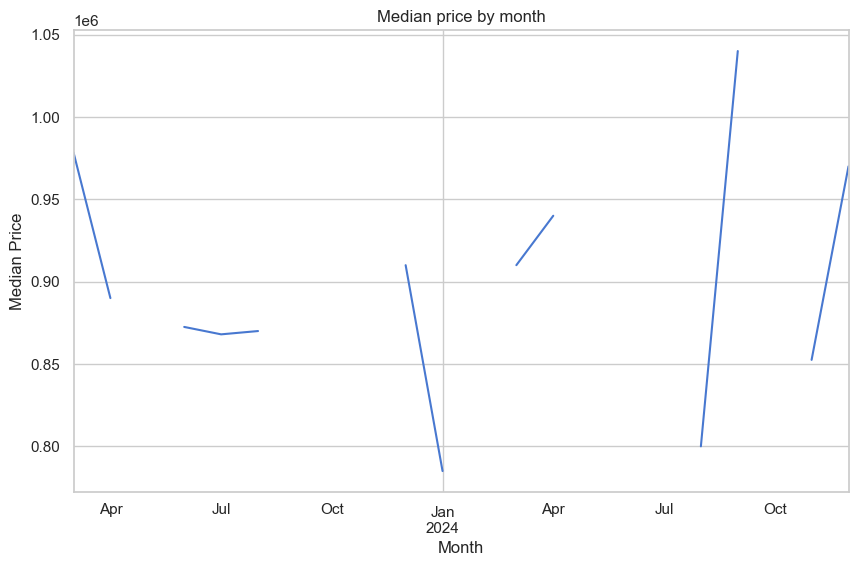

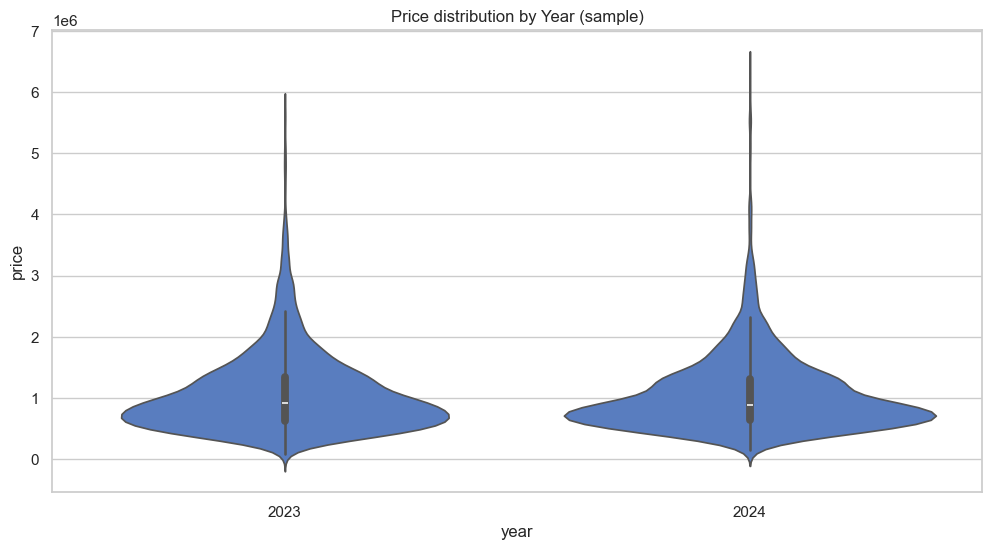

In [18]:
# Temporal analysis: monthly median price (no Period dtype!)
if 'date' in df.columns and df['date'].notna().any():
    monthly = df.set_index('date').resample('M')['price'].median()
    plt.figure(); monthly.plot(); plt.title("Median price by month"); plt.ylabel("Median Price"); plt.xlabel("Month"); plt.show()
    # Violin by year (sample for speed)
    sub = df[['date', 'price']].dropna()
    if len(sub) > 200:
        sub['year'] = sub['date'].dt.year
        plt.figure(figsize=(12,6)); sns.violinplot(x='year', y='price', data=sub.sample(min(5000, len(sub)), random_state=123))
        plt.title("Price distribution by Year (sample)"); plt.show()

Monthly Price Fluctuations: The median price plot shows significant data gaps, making it difficult to identify reliable monthly or seasonal trends. The available data points, however, suggest some price fluctuations.

Annual Price Distribution: The violin plots for 2023 and 2024 show that the median price in 2024 was slightly higher than in 2023. More importantly, the plots confirm that the overall price distribution remains heavily right-skewed in both years.

In summary, the analysis shows that while the market experienced minor price increases over the period, the fundamental characteristics of the price data remained consistent.

# Pycaret Set-Up (Task 2)

In [19]:
from pycaret.regression import *
import mlflow, mlflow.sklearn

# NOTE (Terminal): to view MLflow UI, run:  mlflow ui --port 50000
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Local tracking server

In [20]:
# Build modeling frame (guarantee target present; do not hand-impute)
df_model = df.copy()
df_model.dropna(subset=['price'], inplace=True)
df_model['date'] = pd.to_datetime(df_model['date'], errors='coerce')

# If any Period sneaks in (shouldn't), convert to string to avoid dtype errors
from pandas.api.types import is_period_dtype
for col in list(df_model.columns):
    if is_period_dtype(df_model[col]):
        df_model[col] = df_model[col].astype(str)

In [21]:
# Prevent leakage by excluding target-derived engineered features
leaky_feats = ['price_log', 'price_per_sqm']
ignore_feats = [c for c in ['latitude', 'longitude'] if c in df_model.columns] + leaky_feats

s = setup(
    data=df_model,
    target='price',
    session_id=123,
    train_size=0.8,
    normalize=True,
    transformation=False,
    remove_outliers=False,
    date_features=['date'],
    ignore_features=ignore_feats,
    numeric_imputation='median',
    categorical_imputation='mode',
    log_experiment=True,
    experiment_name='melbourne_housing_price',
    verbose=True
)


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(13572, 22)"
4,Transformed data shape,"(13572, 30)"
5,Transformed train set shape,"(10857, 30)"
6,Transformed test set shape,"(2715, 30)"
7,Ignore features,4
8,Numeric features,10
9,Date features,1


In [22]:
#Print ordinal, numeric and categorical features
print(f'Numeric features: {s._fxs["Numeric"]}')
print(f'Categorical features: {s._fxs["Categorical"]}')
print(f'Date features: {s._fxs["Date"]}')

Numeric features: ['rooms', 'distance', 'bedroom2', 'bathroom', 'car', 'land_size', 'building_area', 'year_built', 'property_count', 'property_age']
Categorical features: ['suburb', 'type', 'method', 'postcode', 'council_area', 'region']
Date features: ['date']


In [23]:
# (Optional) Verify imputation truly happens by transforming X_train through the pipeline
prep_pipe = get_config('pipeline')
X_train_raw = get_config('X_train')
X_train_proc = prep_pipe.transform(X_train_raw)

if isinstance(X_train_proc, pd.DataFrame):
    n_missing = X_train_proc.isna().sum().sum()
else:
    n_missing = np.isnan(X_train_proc).sum()
print("NaNs AFTER pipeline transform:", int(n_missing))

NaNs AFTER pipeline transform: 0


In [24]:
# Baseline & selection
# Compare a broad set first, then pick a champion automatically (R2 or RMSE depending on rubric)
top_models = compare_models(n_select=5, sort='R2')
print("Top models:", top_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,157623.8432,65507109779.5954,255593.3339,0.8290,0.1901,0.1477,2.1720
lightgbm,Light Gradient Boosting Machine,163069.3745,68767219744.0995,261955.4291,0.8205,0.1973,0.1545,1.6160
xgboost,Extreme Gradient Boosting,165610.0078,71683893767.5958,267451.5449,0.8127,0.1988,0.1543,0.9550
rf,Random Forest Regressor,167116.4971,73733850322.3451,271137.7085,0.8078,0.2006,0.1565,1.6300
et,Extra Trees Regressor,173876.3198,79399206834.4405,281291.1011,0.7931,0.2084,0.1626,1.1620
gbr,Gradient Boosting Regressor,180782.4279,80376068994.2683,283217.7121,0.7904,0.2180,0.1744,0.4110
knn,K Neighbors Regressor,214984.5351,120003250592.9729,346014.3150,0.6873,0.2533,0.1992,0.0780
dt,Decision Tree Regressor,229793.6732,141972701283.2422,376509.5776,0.6282,0.2730,0.2105,0.0960
omp,Orthogonal Matching Pursuit,310243.2127,201747296700.6231,448864.0484,0.4736,0.3880,0.3326,0.0720
en,Elastic Net,249290.8945,246467529495.2751,449685.6046,0.3286,0.3107,0.2572,0.0680


Top models: [<catboost.core.CatBoostRegressor object at 0x0000021F1D2E8A90>, LGBMRegressor(n_jobs=-1, random_state=123), XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...), RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123)]


In [25]:
champion = automl(optimize='R2')   # picks the best among trained ones
print("Champion:", champion)

Champion: <catboost.core.CatBoostRegressor object at 0x0000021F1D89A7A0>


In [26]:
# (fast) Fine-tune ONLY the current champion; skip blending to save time
tuned_champion = tune_model(champion, optimize='R2', n_iter=10, fold=3, choose_better=True)
champion = tuned_champion
print("Final champion after lightweight tuning:", champion)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,162918.8470,70342953227.7566,265222.4599,0.8142,0.2008,0.1553
1,169767.9030,75854542050.8660,275417.0330,0.7990,0.2044,0.1598
2,167110.2494,74586320242.3410,273104.9620,0.8111,0.2010,0.1567
Mean,166598.9998,73594605173.6546,271248.1516,0.8081,0.2021,0.1573
Std,2819.3881,2356837842.2300,4364.1065,0.0066,0.0016,0.0019


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Final champion after lightweight tuning: <catboost.core.CatBoostRegressor object at 0x0000021F1D89B7C0>


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

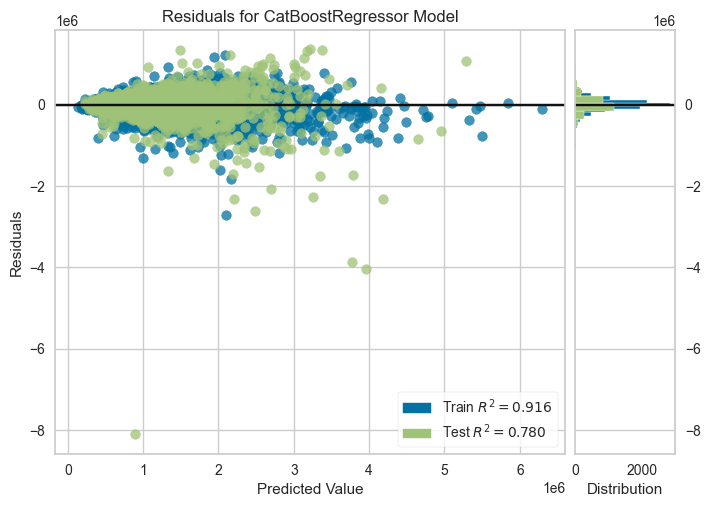

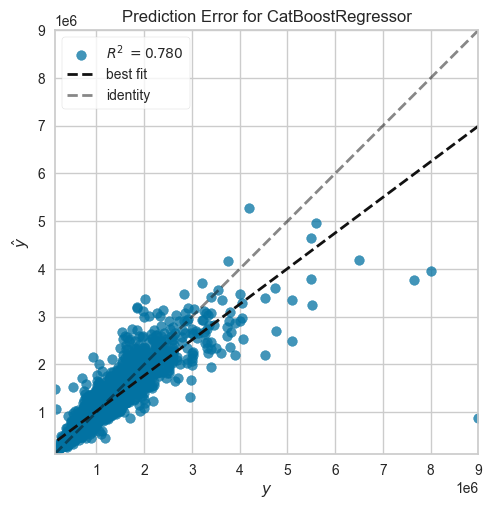

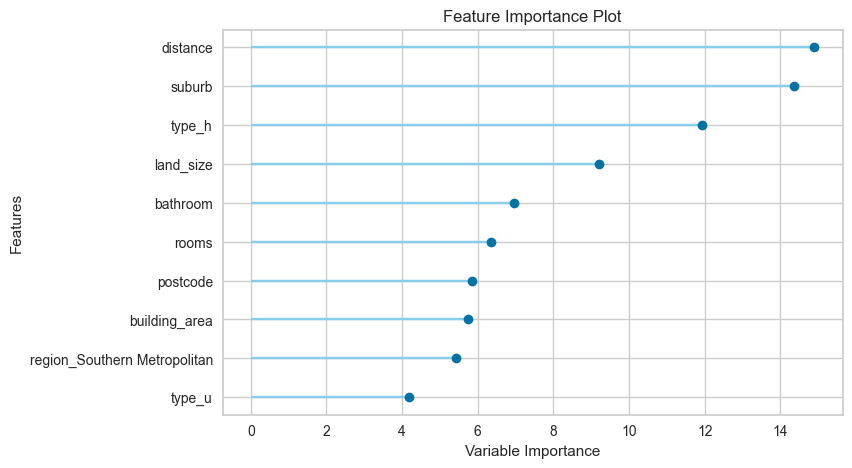

In [27]:
# Diagnostics & explainability
evaluate_model(champion)
plot_model(champion, plot='residuals')
plot_model(champion, plot='error')
plot_model(champion, plot='feature')

Residuals & Prediction Error Plots: These plots indicate that while the model performs well overall (with an R-squared of 0.780), it tends to underestimate the price of high-value properties. The errors are not consistent across all price ranges, suggesting that the model struggles with the most expensive outliers. This highlights a limitation that may need to be addressed with further fine-tuning or a different modeling approach.

Feature Importance Plot: This is a critical finding that validates the entire workflow. The plot shows that distance from the CBD and suburb are the most important features in predicting price. This directly confirms the key insights that the model is learning the most influential relationships in the data, which is a great sign.

In [28]:
# Finalize & Save Locally
# ============================
final_model = finalize_model(champion)

In [29]:
# --- PROJECT PATHS (Windows explicit) ---
BASE_DIR = r"C:\Users\PC\Desktop\MLOPS_Assignment"  # your folder
MODELS_DIR = os.path.join(BASE_DIR, "models")
LOOKUPS_DIR = os.path.join(BASE_DIR, "data", "lookups")

os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(LOOKUPS_DIR, exist_ok=True)

In [30]:
# Save pipeline locally (PyCaret automatically appends .pkl)
model_stem = os.path.join(MODELS_DIR, "melbourne_housing_pipeline")
save_model(final_model, model_stem)
print(f"Saved final model to: {model_stem}.pkl")

Transformation Pipeline and Model Successfully Saved
Saved final model to: C:\Users\PC\Desktop\MLOPS_Assignment\models\melbourne_housing_pipeline.pkl


In [31]:
# (Optional) verify save worked
print("Models dir contents:", os.listdir(MODELS_DIR))

Models dir contents: ['melbourne_housing_pipeline.pkl']


In [32]:
# Predictions: Hold-out & Unseen Scenarios
# ============================================

# a) Internal hold-out validation (PyCaret's split)
holdout_pred = predict_model(final_model)
display(holdout_pred.head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,152468.8984,71447531446.2643,267296.7105,0.8592,0.1841,0.1421


,suburb,rooms,type,method,date,distance,postcode,bedroom2,bathroom,car,land_size,building_area,year_built,council_area,region,property_count,property_age,price,prediction_label
490,Ormond,2,h,S,2023-03-12,11.800000,3204,2,1,1.0,719,NaN,NaN,Glen Eira,Southern Metropolitan,3578,NaN,1960000,1.246338e+06
10517,Richmond,3,h,S,NaT,2.600000,3121,3,2,1.0,192,111.0,1900.0,Yarra,Northern Metropolitan,14949,NaN,1651000,1.604360e+06
328,Hadfield,3,h,S,2023-03-12,12.100000,3046,3,1,1.0,604,112.0,1970.0,Moreland,Northern Metropolitan,2606,53.0,630000,6.827527e+05
7905,Coburg,3,h,S,NaT,7.800000,3058,3,2,2.0,435,NaN,NaN,Moreland,Northern Metropolitan,11204,NaN,1286000,1.158894e+06
9802,Berwick,3,h,SP,NaT,35.200001,3806,3,2,2.0,957,NaN,NaN,NaN,Eastern Victoria,17093,NaN,835000,6.907699e+05


In [33]:
# b) Simulate unseen data: drop target and predict first 30
new_data = df_model.drop(columns=['price'], errors='ignore').copy()
predictions_new = predict_model(final_model, data=new_data.head(30))
display(predictions_new.head())

,suburb,rooms,type,method,date,distance,postcode,bedroom2,bathroom,car,...,year_built,council_area,latitude,longitude,region,property_count,price_log,price_per_sqm,property_age,prediction_label
0,Airport West,3,t,PI,2023-03-09,13.5,3042,3,2,1.0,...,2016.0,Moonee Valley,-37.717999,144.878006,Western Metropolitan,3464,13.641158,3733.333252,7.0,8.422504e+05
1,Albert Park,2,h,S,2023-03-09,3.3,3206,2,1,0.0,...,1900.0,Port Phillip,-37.845901,144.955505,Southern Metropolitan,3280,14.058457,15548.780273,123.0,1.341664e+06
2,Albert Park,2,h,S,2023-03-09,3.3,3206,2,1,0.0,...,NaN,Port Phillip,-37.845001,144.953796,Southern Metropolitan,3280,14.190517,NaN,NaN,1.525306e+06
3,Alphington,4,h,S,2023-03-09,6.4,3078,3,2,4.0,...,1930.0,Darebin,-37.770699,145.031799,Northern Metropolitan,2211,14.508658,7604.562500,93.0,2.307274e+06
4,Alphington,3,h,S,2023-03-09,6.4,3078,3,2,2.0,...,2013.0,Yarra,-37.785400,145.032501,Northern Metropolitan,2211,13.919871,NaN,10.0,1.308577e+06


In [34]:
# c) Explicit test set from PyCaret config
test_df = pd.concat([get_config('X_test'), get_config('y_test')], axis=1)
display(test_df.head())
pred_on_test = predict_model(final_model, data=test_df)
display(pred_on_test.head())

,suburb,rooms,type,method,date,distance,postcode,bedroom2,bathroom,car,land_size,building_area,year_built,council_area,region,property_count,property_age,price
490,Ormond,2,h,S,2023-03-12,11.800000,3204,2,1,1.0,719,NaN,NaN,Glen Eira,Southern Metropolitan,3578,NaN,1960000
10517,Richmond,3,h,S,NaT,2.600000,3121,3,2,1.0,192,111.0,1900.0,Yarra,Northern Metropolitan,14949,NaN,1651000
328,Hadfield,3,h,S,2023-03-12,12.100000,3046,3,1,1.0,604,112.0,1970.0,Moreland,Northern Metropolitan,2606,53.0,630000
7905,Coburg,3,h,S,NaT,7.800000,3058,3,2,2.0,435,NaN,NaN,Moreland,Northern Metropolitan,11204,NaN,1286000
9802,Berwick,3,h,SP,NaT,35.200001,3806,3,2,2.0,957,NaN,NaN,NaN,Eastern Victoria,17093,NaN,835000


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,130601.4817,40439205338.7138,201095.0157,0.9203,0.1638,0.1259


,suburb,rooms,type,method,date,distance,postcode,bedroom2,bathroom,car,land_size,building_area,year_built,council_area,region,property_count,property_age,price,prediction_label
490,Ormond,2,h,S,2023-03-12,11.800000,3204,2,1,1.0,719,NaN,NaN,Glen Eira,Southern Metropolitan,3578,NaN,1960000,1.371730e+06
10517,Richmond,3,h,S,NaT,2.600000,3121,3,2,1.0,192,111.0,1900.0,Yarra,Northern Metropolitan,14949,NaN,1651000,1.520572e+06
328,Hadfield,3,h,S,2023-03-12,12.100000,3046,3,1,1.0,604,112.0,1970.0,Moreland,Northern Metropolitan,2606,53.0,630000,6.584617e+05
7905,Coburg,3,h,S,NaT,7.800000,3058,3,2,2.0,435,NaN,NaN,Moreland,Northern Metropolitan,11204,NaN,1286000,1.056102e+06
9802,Berwick,3,h,SP,NaT,35.200001,3806,3,2,2.0,957,NaN,NaN,NaN,Eastern Victoria,17093,NaN,835000,7.404360e+05


In [35]:
# Save/Load sanity check (local .pkl pipeline)
# ============================================
loaded_pipeline = load_model(model_stem)
print("Loaded pipeline (local .pkl):", loaded_pipeline)

Transformation Pipeline and Model Successfully Loaded
Loaded pipeline (local .pkl): Pipeline(memory=FastMemory(location=C:\Users\PC\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['rooms', 'distance', 'bedroom2',
                                             'bathroom', 'car', 'land_size',
                                             'building_area', 'year_built',
                                             'property_count', 'property_ag...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['suburb', 'postcode',
                                         

In [36]:
# Consume the model directly FROM MLflow
#    (no terminal needed; uses the server we started)
# ============================================
# Find the most recent successful run for our experiment
experiment_name = "melbourne_housing_price"
exp = mlflow.get_experiment_by_name(experiment_name)
runs = mlflow.search_runs(
    experiment_ids=[exp.experiment_id],
    order_by=["attributes.start_time DESC"],
    max_results=1
)
assert len(runs) > 0, "No MLflow runs found. Did setup()/compare_models() run with log_experiment=True?"
run_id = runs.iloc[0]['run_id']
print("Latest MLflow run_id:", run_id)

Latest MLflow run_id: ed23762fdf194456aea08d069eba5541


In [40]:
# Load the PyFunc “model” artifact from that run and score
logged_model_uri = f"runs:/ed23762fdf194456aea08d069eba5541/model"
loaded_from_mlflow = mlflow.pyfunc.load_model(logged_model_uri)
print("Loaded from MLflow (pyfunc):", type(loaded_from_mlflow))

Loaded from MLflow (pyfunc): <class 'mlflow.pyfunc.PyFuncModel'>


In [41]:
# Prepare a small sample (drop target) and predict with pyfunc
consume_sample = df_model.drop(columns=['price'], errors='ignore').head(5)
# pyfunc model expects a DataFrame with the same feature names as during training
pyfunc_preds = loaded_from_mlflow.predict(consume_sample)
print("PyFunc predictions:", pyfunc_preds)

PyFunc predictions: [ 842250.37766398 1341664.26684331 1525306.14508934 2307274.08825519
 1308577.41436465]


In [42]:
# Export lookup CSVs for a future UI
# ============================================
for col in ['suburb','type','method','region','postcode']:
    if col in df_model.columns:
        out_fp = os.path.join(LOOKUPS_DIR, f"{col}_list.csv")
        pd.DataFrame(sorted(df_model[col].dropna().astype(str).unique()),
                     columns=[col]).to_csv(out_fp, index=False)
print("Lookup CSVs exported to:", LOOKUPS_DIR)

Lookup CSVs exported to: C:\Users\PC\Desktop\MLOPS_Assignment\data\lookups
